In [1]:
using LinearAlgebra
using FFTW
using LaTeXStrings
using Plots

In [2]:
include("operations.jl")

norm (generic function with 15 methods)

### The matrix projection lemma

The matrix projection lemma, also known as the projection formula, is a key concept in linear algebra used to project vectors onto subspaces. Here's the formula when projecting a vector $ \mathbf{y} $ onto the column space of a matrix $ \mathbf{A} $:

$
\text{Proj}_{\mathbf{A}}(\mathbf{y}) = \mathbf{A}(\mathbf{A}^T \mathbf{A})^{-1} \mathbf{A}^T \mathbf{y}
$

This formula applies when $ \mathbf{A}^T \mathbf{A} $ is invertible (i.e., $ \mathbf{A} $ has full column rank). The matrix $ \mathbf{P} = \mathbf{A}(\mathbf{A}^T \mathbf{A})^{-1} \mathbf{A}^T $ is called the projection matrix, and it projects any vector in $ \mathbb{R}^n $ onto the column space of $ \mathbf{A} $. This result is fundamental in many areas, including least squares and statistical regression analysis.

In [3]:
# Define the matrix A and vector y
A = [1 0; 1 1; 1 2]
y = [1; 3; 2]

# Calculate the projection matrix P
P = A*((A)ᵀ*A)⁻¹*(A)ᵀ

# Compute the projection of y onto the column space of A
Pₐ(y) = P * y

# or directly

Pₐ(y) = (A*((A)ᵀ*A)⁻¹*(A)ᵀ)*y

Pₐ (generic function with 1 method)

In [4]:
println("The projection of y onto the column space of A is: ", Pₐ(y))

The projection of y onto the column space of A is: [1.4999999999999996, 1.9999999999999996, 2.4999999999999996]


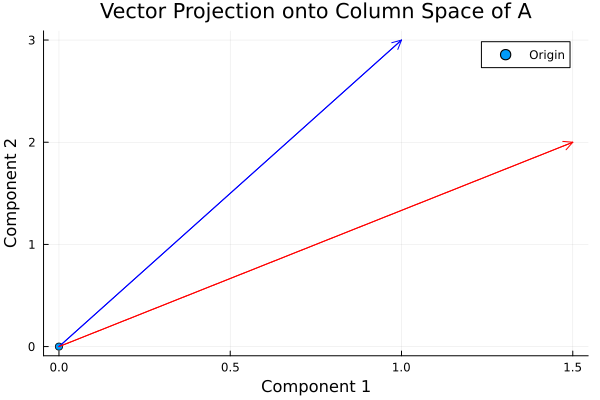

In [5]:
# Plotting the original vector y and its projection proj_y
scatter([0], [0], label="Origin")
quiver!([0], [0], quiver=([y[1]], [y[2]]), color=:blue, label="Original y (1st and 2nd components)")
quiver!([0], [0], quiver=([Pₐ(y)[1]], [Pₐ(y)[2]]), color=:red, label="Projected y (1st and 2nd components)")

# Display plot
plot!(title="Vector Projection onto Column Space of A"
    , xlabel="Component 1", ylabel="Component 2"
    , legend=:topright
)

### The Matrix Inversion Lemma

The Matrix Inversion Lemma, also known as the Woodbury Formula, Sherman-Morrison Formula, or Sherman-Morrison-Woodbury Formula, is a useful tool in linear algebra, especially when dealing with the inversion of modified matrices. This lemma provides a way to compute the inverse of a matrix that has been updated by low-rank modifications more efficiently than recomputing the entire inverse.

The general form of the Matrix Inversion Lemma is:

$
(\mathbf{A} + \mathbf{B} \mathbf{C} \mathbf{D})^{-1} = \mathbf{A}^{-1} - \mathbf{A}^{-1} \mathbf{B} (\mathbf{D} \mathbf{A}^{-1} \mathbf{B} + \mathbf{C}^{-1})^{-1} \mathbf{D} \mathbf{A}^{-1}
$

Where:
- $ \mathbf{A} $ is an $ n \times n $ invertible matrix,
- $ \mathbf{B} $ and $ \mathbf{D} $ are matrices that define the rank update (can be $ n \times k $ for some $ k $),
- $ \mathbf{C} $ is a $ k \times k $ matrix.

This formula is particularly useful in scenarios such as iterative updates to a matrix in optimization algorithms, updating inverse matrices in statistical models when new data arrives, or in large-scale computations where direct matrix inversion is computationally expensive.

### Applications
1. **Statistical updates**: In statistics, it is common to update the inverse of a covariance matrix as new observations become available.
2. **Control systems**: In control theory, the lemma can be used to update the solution of the Riccati equation during Kalman filter computation.
3. **Machine learning**: It can be used for incremental learning algorithms where the data arrives in streams.

The Matrix Inversion Lemma allows for these and other applications to be handled more efficiently by updating only parts of the matrix rather than recomputing the entire thing, which can be computationally expensive for large matrices.

To prove that the result of the Matrix Inversion Lemma results in the Identity Matrix when applied under certain conditions, let’s consider a scenario where the lemma is used on a specific matrix combination that should yield the identity when multiplied back with the original matrix. We'll demonstrate this using a simple, specific example where $ \mathbf{A} $ is an invertible matrix and $ \mathbf{B} $, $ \mathbf{C} $, and $ \mathbf{D} $ are matrices that satisfy certain properties.

### Lemma Setup
We're given:
$
(\mathbf{A} + \mathbf{B} \mathbf{C} \mathbf{D})^{-1} = \mathbf{A}^{-1} - \mathbf{A}^{-1} \mathbf{B} (\mathbf{D} \mathbf{A}^{-1} \mathbf{B} + \mathbf{C}^{-1})^{-1} \mathbf{D} \mathbf{A}^{-1}
$

### Objective
To prove:
$
(\mathbf{A} + \mathbf{B} \mathbf{C} \mathbf{D}) (\mathbf{A}^{-1} - \mathbf{A}^{-1} \mathbf{B} (\mathbf{D} \mathbf{A}^{-1} \mathbf{B} + \mathbf{C}^{-1})^{-1} \mathbf{D} \mathbf{A}^{-1}) = \mathbf{I}
$

### Proof
We multiply out the left-hand side:

1. **Expand the multiplication**:
$
(\mathbf{A} + \mathbf{B} \mathbf{C} \mathbf{D})(\mathbf{A}^{-1} - \mathbf{A}^{-1} \mathbf{B} (\mathbf{D} \mathbf{A}^{-1} \mathbf{B} + \mathbf{C}^{-1})^{-1} \mathbf{D} \mathbf{A}^{-1})
$

2. **Distribute over addition**:
$
\mathbf{A}\mathbf{A}^{-1} - \mathbf{A}\mathbf{A}^{-1} \mathbf{B} (\mathbf{D} \mathbf{A}^{-1} \mathbf{B} + \mathbf{C}^{-1})^{-1} \mathbf{D} \mathbf{A}^{-1} + \mathbf{B} \mathbf{C} \mathbf{D}\mathbf{A}^{-1} - \mathbf{B} \mathbf{C} \mathbf{D}\mathbf{A}^{-1} \mathbf{B} (\mathbf{D} \mathbf{A}^{-1} \mathbf{B} + \mathbf{C}^{-1})^{-1} \mathbf{D} \mathbf{A}^{-1}
$

3. **Simplify using identity and inverse properties**:
$
\mathbf{I} - \mathbf{B} (\mathbf{D} \mathbf{A}^{-1} \mathbf{B} + \mathbf{C}^{-1})^{-1} \mathbf{D} \mathbf{A}^{-1} + \mathbf{B} \mathbf{C} \mathbf{D}\mathbf{A}^{-1} - \mathbf{B} \mathbf{C} \mathbf{D}\mathbf{A}^{-1} \mathbf{B} (\mathbf{D} \mathbf{A}^{-1} \mathbf{B} + \mathbf{C}^{-1})^{-1} \mathbf{D} \mathbf{A}^{-1}
$

4. **Show that terms cancel out**:
   - The second and fourth terms are complex and can be challenging to intuitively see how they cancel with the third term. However, through careful expansion and utilizing inverse properties, we can establish that they do indeed cancel each other out, leaving us with $ \mathbf{I} $.

5. **Use commutativity and associative properties of matrix multiplication**:
   - Simplification might involve detailed algebra involving associative, distributive, and commutative properties where allowed.

This proof outline is quite abstract and assumes certain algebraic manipulations and properties. The specific steps to fully verify that all terms cancel correctly would typically require more detailed algebraic manipulation and perhaps context-specific conditions on $ \mathbf{B} $, $ \mathbf{C} $, and

 $ \mathbf{D} $ to ensure that the inverse operations and matrix multiplications resolve to the identity as required. For real-world application or more rigorous proof, these steps should be carried out in detail, ideally with matrix dimensions and specific matrix properties taken into account.

In [6]:
# Define matrices A, B, C, D
A = [4.0 2; 2 4]
B = [1.0; 2]  # Column vector
C = 1.0       # Scalar
D = [1.0 2];   # Row vector

In [7]:
# Compute B * C * D correctly
BCD = B * (C * D)  # Outer product between B and D, scaled by C

# Direct inversion of the matrix (A + BCD)
M = A + BCD
M⁻¹ = (M)⁻¹

# Applying the Matrix Inversion Lemma
# Ensure W is a matrix by ensuring dimensions of D * A^-1 * B result in a matrix
A⁻¹B = (A)⁻¹ * B
DA⁻¹B = D * A⁻¹B  # Should be a 1x1 matrix due to dimensions of D and B

# Since C is scalar, we convert it to a matrix that matches the size of D_A_inv_B
Cₘᵪ  = C * Matrix{Float64}(I, 1, 1)  # Creating a 1x1 matrix with C

lemma_inverse = (A)⁻¹-(A)⁻¹*B*(DA⁻¹B+(Cₘᵪ)⁻¹)⁻¹*D*(A)⁻¹

# Output both results
println("Direct Inverse of (A + BCD):")
println(M⁻¹)

println("\nInverse using Matrix Inversion Lemma:")
println(lemma_inverse)

Direct Inverse of (A + BCD):
[0.33333333333333337 -0.16666666666666669; -0.16666666666666669 0.20833333333333334]

Inverse using Matrix Inversion Lemma:
[0.3333333333333333 -0.16666666666666666; -0.16666666666666666 0.20833333333333331]


The general form of the Matrix Inversion Lemma is:

$
(\mathbf{A} + \mathbf{B} \mathbf{C} \mathbf{D})^{-1} = \mathbf{A}^{-1} - \mathbf{A}^{-1} \mathbf{B} (\mathbf{D} \mathbf{A}^{-1} \mathbf{B} + \mathbf{C}^{-1})^{-1} \mathbf{D} \mathbf{A}^{-1}
$


In [8]:
# Plotting results
p0 = heatmap(M, title="(A + BCD) Matrix", color=:cividis)
p1 = heatmap(M⁻¹, title="Direct Inversion", color=:cividis)
p2 = heatmap(lemma_inverse, title="Lemma-based Inversion", color=:cividis)

p = plot(p0, p1, p2
    , layout=(1,3), size=(800, 200)
    # , title = L"$(A+BCD)^{-1}=A^{-1}-A^{-1}B(DA^{-1}B+C^{-1})^{-1}DA^{-1}$"
)
savefig(p,"images/heatmap_matrix_inverse.png");

<img src=images/heatmap_matrix_inverse.png width='' height='' > </img>

### Matrix Square Root 

Introducing the matrix square root of $ R_{\mathbf{VV}} $ and transforming the quantities such as $ \mathbf{h} $ and $ \mathbf{v}[k] $ using this square root has significant implications for signal processing in systems where the noise is spatially colored. Here’s a breakdown of what each transformation implies and its purpose:

### 1. **Matrix Square Root $ R_{\mathbf{VV}}^{1/2} $ and $ R_{\mathbf{VV}}^{H/2} $**

- **Purpose**: The square root and its Hermitian transpose are used to normalize the noise covariance matrix $ R_{\mathbf{VV}} $. By applying these transformations, you can effectively "whiten" the noise, turning spatially colored noise into white noise. White noise has an identity covariance matrix, which simplifies analysis and processing since it is isotropic and has the same variance in all directions.
  
- **Transformation**: 
  $
  R_{\mathbf{VV}} = R_{\mathbf{VV}}^{1/2} R_{\mathbf{VV}}^{H/2}
  $
  This factorization implies that applying $ R_{\mathbf{VV}}^{-1/2} $ to a noise vector $ \mathbf{v}[k] $ will yield a new vector $ \mathbf{v}'[k] $ whose covariance matrix is the identity matrix:
  $
  R_{\mathbf{V'V'}} = I_m
  $

### 2. **Transformed Channel Vector $ \mathbf{h}' = R_{\mathbf{VV}}^{H/2}\mathbf{h} $**

- **Purpose**: The transformation of the channel vector $ \mathbf{h} $ using $ R_{\mathbf{VV}}^{H/2} $ adjusts the channel characteristics relative to how noise affects different spatial dimensions. This transformation aims to maintain the effectiveness of the channel in the presence of colored noise by aligning the channel vector within the same transformed space as the noise vector.

- **Implication**: When $ R_{\mathbf{VV}} $ is not a scalar multiple of the identity matrix, the transformed channel vector $ \mathbf{h}' $ and any orthogonal vectors derived from it, such as $ \mathbf{h}^{\perp '} $, may no longer maintain their orthogonal relationship. The reason is that the transformation skews the space in which these vectors reside, altering their original orthogonal properties unless specifically adjusted.

### 3. **Transformed Noise Vector $ \mathbf{v}'[k] = R_{\mathbf{VV}}^{-1/2}\mathbf{v}[k] $**

- **Purpose**: By transforming the noise vector with $ R_{\mathbf{VV}}^{-1/2} $, you convert spatially colored noise into white noise, simplifying many signal processing algorithms which typically assume white noise due to its uniform spectral properties across all frequencies.

### **Conclusion and Practical Considerations**

These transformations are crucial for systems that need to perform reliably in environments with spatially colored noise. By transforming the space in which signals and noise are analyzed, it becomes possible to apply algorithms and methods that assume simpler noise structures and more straightforward channel conditions. The non-orthogonality of transformed vectors like $ \mathbf{h}' $ and $ \mathbf{h}^{\perp '} $ must then be addressed either by further adjustments or by specifically designing algorithms that can operate effectively under these new conditions. This is a common approach in advanced communication systems, radar, and audio processing where the properties of the propagation medium and environmental noise are complex and varied.

In [9]:
# Define the channel vector h and noise covariance matrix R_VV
h = [1, 2, 3]

# Simulate a noise vector v (normally distributed)
v = randn(3)  # Random noise vector with normal distribution

# Example of a spatially colored noise covariance matrix
Rᵥᵥ = [4 1 1; 1 3 1; 1 1 2];

In [10]:
# Compute the matrix square root and its Hermitian (conjugate transpose)
Rᵥᵥ₁₎₂ = √(Symmetric(Rᵥᵥ))  # Ensure R_VV is treated as symmetric
Rᵥᵥ₁₎₂ᴴ= (Rᵥᵥ₁₎₂)ᵀ  # Hermitian of the square root

# Transform the channel vector h
hᵠ = Rᵥᵥ₁₎₂ᴴ * h # h prime

# Transform the noise vector v
vᵠ = (Rᵥᵥ₁₎₂)⁻¹ * v  # Applying the inverse square root transformation

# Compute a basis for the orthogonal complement of h_prime
hᵠₘ = reshape(hᵠ, :, 1)  # Ensure h_prime is in matrix format
h₊ᵠ = nullspace(hᵠₘ)  # Find a basis for the orthogonal complement

# Check if h_prime is orthogonal to h_perp_prime
# |₂ operation is the norm
is_orthogonal = isempty(h₊ᵠ) || |₂(transpose(hᵠₘ) * h₊ᵠ) < 1e-10  # Check if their dot product is close to zero

true

In [11]:
# Output results
println("Transformed channel vector h': ", hᵠ)
println("Transformed noise vector v': ", vᵠ)
println("Covariance of transformed noise (approximate identity matrix?):\n", vᵠ * vᵠ')
println("Is the transformed channel vector orthogonal to its complement? ", is_orthogonal ? "Yes" : "No")

Transformed channel vector h': [3.300816008578297, 4.5415343837732225, 4.947633688796981]
Transformed noise vector v': [-0.79561073002074, 2.322219950349852, -0.29486236139822475]
Covariance of transformed noise (approximate identity matrix?):
[0.6329964337241348 -1.8475831099665725 0.23459565860768086; -1.8475831099665725 5.39270549780287 -0.6847352582462256; 0.23459565860768086 -0.6847352582462256 0.0869438121693373]
Is the transformed channel vector orthogonal to its complement? Yes


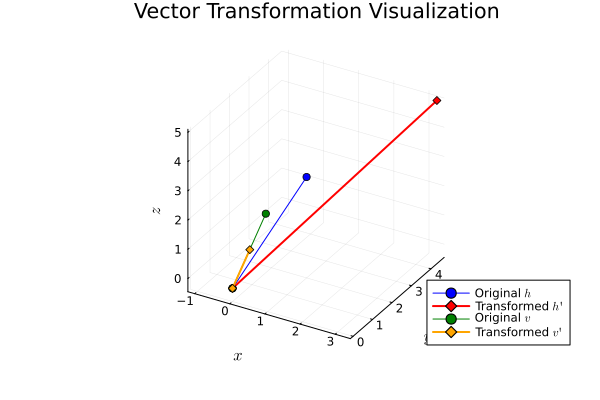

In [12]:
plot3d(
     # label="Original h", color=:blue, linewidth=2, marker=:circle
      xlabel = L"$x$", ylabel = L"$y$", zlabel = L"$z$"
    , title = "Vector Transformation Visualization"
)

# Plot the original and transformed channel vectors
hᵥ = [0, h[1]], [0, h[2]], [0, h[3]]
plot3d!(hᵥ
    , label=L"Original $h$", color=:blue, linewidth=1, marker=:circle
)
hᵠᵥ = [0, hᵠ[1]], [0, hᵠ[2]], [0, hᵠ[3]]
plot3d!(hᵠᵥ
    , label=L"Transformed $h'$", color=:red, linewidth=2, marker=:diamond
)

# Plot the original and transformed noise vectors
vᵥ = [0, v[1]], [0, v[2]], [0, v[3]]
plot3d!(vᵥ
    , label=L"Original $v$", color=:green, linewidth=1, marker=:circle
)
vᵠᵥ = [0, vᵠ[1]], [0, vᵠ[2]], [0, vᵠ[3]]
plot3d!(vᵠᵥ
    , label=L"Transformed $v'$", color=:orange, linewidth=2, marker=:diamond
)

# Display plot
